### 5. Lab: LMS Algorithm

In [125]:
import numpy as np
import scipy.io
import torch
import torch.nn as nn
import random
import math
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.metrics import mean_squared_error
import scipy.io

In [21]:
# download dataset into Numpy array
mat = scipy.io.loadmat('Hw 1-dataset.mat')

In [22]:
print(type(mat))

<class 'dict'>


In [23]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'D', 'X'])

##### 1a. Directly compute the least square (Wiener) solution with the provided dataset. What is the optimal weight W? What is the MSE loss of the whole dataset when the weight is set to W?

In [126]:
data = mat.get("X")
target = mat.get("D")

In [25]:
# optimal weights W* 
optimal_weights = np.dot((np.dot(np.linalg.inv(np.dot(data.T,data)),data.T)),target)
print("The optimal weights:", optimal_weights)

The optimal weights: [[ 1.0006781 ]
 [ 1.00061145]
 [-2.00031968]]


In [26]:
# MSE loss of whole data when weight is set to optimal weight
predicted = np.dot(data, optimal_weights) 
# compute MSE
mse = (np.sum(np.square(target - predicted)))/(2*len(data))
print("MSE loss:", mse)

MSE loss: 5.039951565868384e-05


The optimal weights for W are 1.0006781, 1.00061145, and -2.00031968. The MSE loss is 5.039951565868384e-05. 

##### 1b. Now consider that you can only train with 1 pair of data point and target each time. In such case, the LMS algorithm should be used to find the optimal weight. Please initialize the weight vector as W0 = [0, 0, 0]T , and update the weight with the LMS algorithm. After each epoch (every time you go through all the training data and loop back to the beginning), compute and record the MSE loss of the current weight on the whole dataset. Run LMS for 20 epochs with learning rate r = 0.01, report the weight you get in the end and plot the MSE loss in log scale vs. Epochs.

In [27]:
# initialize weights to be all zero
theta = np.zeros(3)
MSE_lst = []
for _ in range(20):
    for i in range(0, len(data)):
        E = 0 
        predicted = np.transpose(np.array(theta)).dot(np.array(data[i]))
        E = E + np.power((predicted - target[i]), 2)
        # update weights
        theta = theta + 0.01 * (target[i] - predicted) * data[i]
    MSE_lst.append(E) 
print(theta)
print(E)

[ 1.00074855  1.00082859 -2.00068123]
[8.18759089e-05]


In [28]:
print("For each epoch, the MSE loss of the current weight on the whole dataset:", MSE_lst)

For each epoch, the MSE loss of the current weight on the whole dataset: [array([0.09137405]), array([0.00932383]), array([0.00066183]), array([3.73301647e-06]), array([3.3634425e-05]), array([6.71321906e-05]), array([7.88330207e-05]), array([8.1853185e-05]), array([8.2332963e-05]), array([8.22382752e-05]), array([8.2089857e-05]), array([8.19879624e-05]), array([8.19308432e-05]), array([8.19017012e-05]), array([8.18876235e-05]), array([8.18810616e-05]), array([8.1878079e-05]), array([8.18767484e-05]), array([8.18761633e-05]), array([8.18759089e-05])]


In [29]:
epochs = list(range(1,21))

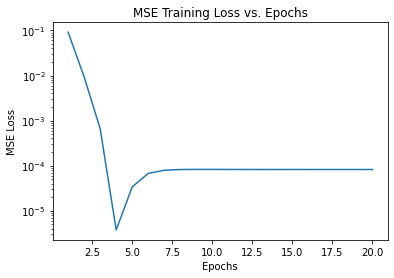

In [30]:
plt.plot(epochs, MSE_lst)
plt.title("MSE Training Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.yscale('log')

After 20 epochs, the final weights are 1.00074855, 1.00082859, and -2.00068123. The MSE final loss is 8.18759089e-05. 

##### 1c. Scatter plot the points (x1k, x2k, dk) for all 100 data-target pairs in a 3D figure, and plot the lines corresponding to the linear models you got in (a) and (b) respectively in the same figure. Observe if the linear models fit the data well.

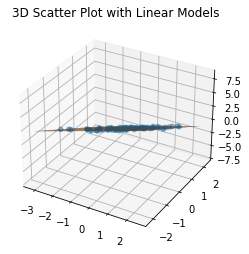

In [127]:
# data for three-dimensional scattered points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# second column from data
x = list(data[:,1])
# third column from data
y = list(data[:,2])
# scatter plot
ax.scatter(x, y, target, alpha=0.5)

# create x,y
a = np.linspace(min(x), max(x), 100)
b = np.linspace(min(y), max(y), 100)

xx, yy = np.meshgrid(a, b)
#meshgrid form linspace

# plane from 1a
z_1 = optimal_weights[1] * xx + optimal_weights[2] * yy + optimal_weights[0]                        
ax.plot_surface(xx, yy, z_1, alpha=0.5)

# plane from 1b
z_2 = theta[1] * xx + theta[2] * yy + theta[0]
ax.plot_surface(xx, yy, z_2, alpha=0.5)

# rotate the axes and update
# ax.view_init(-130, 60)
# ax.view_init(4, 60)
plt.title("3D Scatter Plot with Linear Models")
plt.show()

The linear model fits the data perfectly, since the data points lie very close to the plane. The planes from 1a and 1b overlap.

##### 1d. Learning rate r is an important hyperparameter for the LMS algorithm, as well as for CNN optimization. Here, try repeat the process in (b) with r set to 0.005, 0.05 and 0.5 respectively. Together with the result you got in (b), plot the MSE losses of the 4 sets of experiments in log scale vs. Epochs in one figure. Then try further enlarge the learning rate to r = 1 and observe how the MSE changes. Based on these observations, comment on how learning rate affects the speed and quality of the learning process.

In [128]:
def lms(lr):
    theta = np.zeros(3)
    MSE_lst = []
    for _ in range(20):
        for i in range(0, len(data)):
            E = 0 
            predicted = np.transpose(np.array(theta)).dot(np.array(data[i]))
            E = E + np.power((predicted - target[i]), 2)
            # update weights
            theta = theta + lr * (target[i] - predicted) * data[i]
        MSE_lst.append(E)
    return MSE_lst

# lr = 0.01
lr_01 = lms(0.01)

# lr = 0.005
lr_005 = lms(0.005)

# lr = 0.05 
lr_05 = lms(0.05)

# lr = 0.5
lr_5 = lms(0.5)

#lr = 1
lr_1 = lms(1)

/tmp/ipykernel_51959/4052076416.py:8: RuntimeWarning: overflow encountered in power
  E = E + np.power((predicted - target[i]), 2)


In [129]:
lr_1

[array([4.24772736e+18]),
 array([2.75663473e+37]),
 array([1.78896767e+56]),
 array([1.16098273e+75]),
 array([7.53440618e+93]),
 array([4.88958835e+112]),
 array([3.17318627e+131]),
 array([2.05929628e+150]),
 array([1.33641734e+169]),
 array([8.67292062e+187]),
 array([5.62844776e+206]),
 array([3.65268237e+225]),
 array([2.37047389e+244]),
 array([1.53836165e+263]),
 array([9.98347451e+281]),
 array([6.47895528e+300]),
 array([inf]),
 array([inf]),
 array([inf]),
 array([inf])]

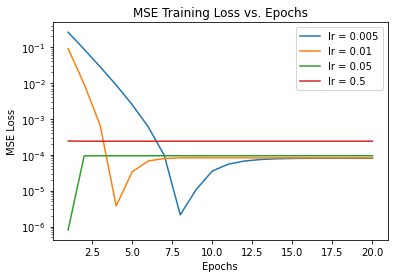

In [130]:
# plot MSE for lr = 0.01, 0.005, 0.05, 0.5
plt.plot(epochs, lr_005, label = "lr = 0.005")
plt.plot(epochs, lr_01, label = 'lr = 0.01')
plt.plot(epochs, lr_05, label = "lr = 0.05")
plt.plot(epochs, lr_5, label = "lr = 0.5")

plt.legend()
plt.title("MSE Training Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.yscale('log')

Based on these observations, learning rate changes the speed and quality of the learning process. Learning rate controls how weights are adjusted. When the learning rate is small, like 0.005, it takes longer to converge nad a waste of computing resources, but it may have better quality in terms of finding local minima. When the learning rate is too big, like 0.5, then the loss remains constant as epochs increase. While a larger learning rate increases speed, the quality of learning decreases since it can overshoot the minimum or fail to converge. When learning rate = 1, this causes the MSE loss to reach infinity, which means that the model is making large errors and divergence of loss. 